# Линейная регрессия на TensorFlow

## Генерируем данные

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

batch_x, batch_y = mnist.train.next_batch(3)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [2]:
batch_y

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [3]:
import google.protobuf
print google.protobuf.__version__

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(google.protobuf.__version__)? (<ipython-input-3-f99c23926689>, line 2)

In [4]:
import numpy as np
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (10,10)
legend_fontsize = 16

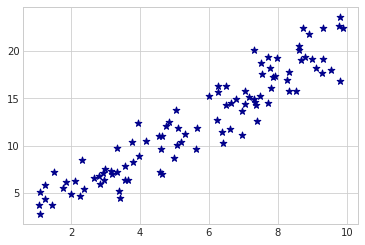

In [5]:
true_slope, true_bias = 2., 1.
n_samples = 100

X_data = np.random.uniform(1, 10, (n_samples, 1))
y_data = true_slope * X_data + true_bias + np.random.normal(0, 2, (n_samples, 1))

fig, ax = plt.subplots()
ax.scatter(X_data, y_data, s=50, marker='*', color='darkblue')
plt.show()

## Объявляем переменные и модель

In [6]:
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

k = tf.Variable(np.random.randn(), name="slope")
b = tf.Variable(np.random.randn(), name="bias")

y_pred = tf.multiply(X, k) + b
loss = tf.reduce_sum(tf.pow(y - y_pred, 2)) / n_samples

## Основной цикл обучения

In [7]:
batch_size, num_steps, learning_rate, display_step = 10, 10000, .05, 1000

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
with tf.Session() as sess:
    init = tf.initialize_all_variables()
    sess.run(init)
    for i in range(num_steps):
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        sess.run(optimizer, feed_dict = { X : X_batch, y : y_batch })
        if (i+1) % display_step == 0:
            loss_val, k_val, b_val = sess.run([ loss, k, b ], feed_dict = { X : X_data, y : y_data })
            print("Epoch %d: %.8f, k=%.4f, b=%.4f" % (i+1, loss_val, k_val, b_val))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch 1000: 3.51943803, k=2.0369, b=1.0267
Epoch 2000: 3.51087618, k=1.9865, b=1.1447
Epoch 3000: 3.58801651, k=2.0441, b=1.1819
Epoch 4000: 3.53177786, k=2.0140, b=1.2569
Epoch 5000: 3.73723197, k=1.9122, b=1.2219
Epoch 6000: 3.52067590, k=1.9609, b=1.2688
Epoch 7000: 3.52886581, k=2.0170, b=1.2277
Epoch 8000: 3.80835986, k=1.8968, b=1.2515
Epoch 9000: 3.50125074, k=1.9807, b=1.2574
Epoch 10000: 3.51328635, k=2.0087, b=1.2241


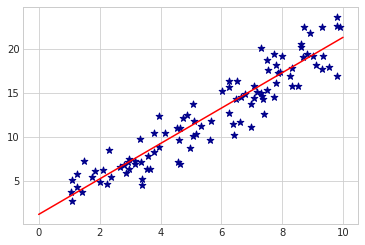

In [8]:
fig, ax = plt.subplots()
ax.scatter(X_data, y_data, s=50, marker='*', color='darkblue')
ax.plot(np.arange(0, 10, 0.01), k_val * np.arange(0, 10, 0.01) + b_val, color='red')
plt.show()

# Логистическая регрессия на Keras

## Генерируем данные

In [9]:
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from keras.models import Sequential
from keras.layers import Input, Dense, Activation

Using TensorFlow backend.


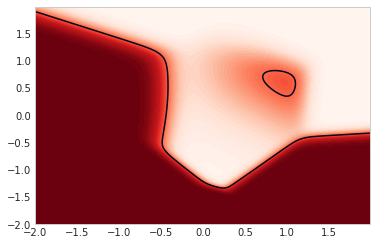

In [32]:
x, y = np.mgrid[-2:2:.01, -2:2:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

centers_1 = np.random.multivariate_normal([-1,-1], 1.5*np.identity(2), size=10)
centers_2 = np.random.multivariate_normal([1,1], 1.5*np.identity(2), size=10)


def mn(x, c, mat):
    return sp.stats.multivariate_normal.pdf(x, mean=c, cov=mat)


def sample_point(centers, cov=.1 * np.identity(2)):
    i = np.random.randint(len(centers))
    return np.random.multivariate_normal(centers[i], cov)


def my_density(pos, centers):
    return np.sum([ mn(pos, c, .1 * np.identity(2)) for c in centers ], axis=0) / float(len(centers))


def my_density_ratio(pos, centers_1, centers_2):
    return my_density(pos, centers_1) / (my_density(pos, centers_1) + my_density(pos, centers_2))


z_1 = my_density(pos, centers_1)
z_2 = my_density(pos, centers_2)
z = my_density_ratio(pos, centers_1, centers_2)

num_levels = 50
plt.contourf(x, y, z, num_levels, cmap='Reds', ls=None, transparent=True)
plt.contour(x, y, z, levels=[0.5], color='black')
plt.show()

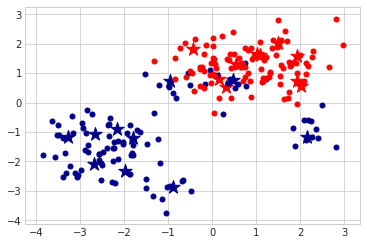

In [33]:
points_1 = np.array([ sample_point(centers_1, cov=.2 * np.identity(2)) for _ in range(100) ])
points_2 = np.array([ sample_point(centers_2, cov=.2 * np.identity(2)) for _ in range(100) ])
points_test_1 = np.array([ sample_point(centers_1, cov=.2 * np.identity(2)) for _ in range(10) ])
points_test_2 = np.array([ sample_point(centers_2, cov=.2 * np.identity(2)) for _ in range(100) ])


def plot_twopoints(ax, d1, d2, sizes=[15,25], markers=[ 'o', '*' ], colors=['0.3', '0.3']):
    ax.scatter(d1[:,0], d1[:,1], s=sizes[0], marker=markers[0], color=colors[0])
    ax.scatter(d2[:,0], d2[:,1], s=sizes[1], marker=markers[1], color=colors[1])

    
fig, ax = plt.subplots()
plot_twopoints(ax, centers_1, centers_2, sizes=[200,200], markers=['*', '*'], colors=['darkblue', 'r'])
plot_twopoints(ax, points_1, points_2, sizes=[25,25], markers=['o', 'o'], colors=['darkblue', 'r'])
plt.show()

0.9090909090909091


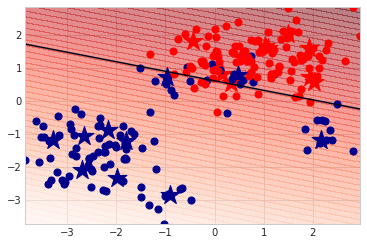

In [34]:
x_and_y = [ (p, 0) for p in points_1 ] + [ (p,1) for p in points_2 ]
np.random.shuffle(x_and_y)

data_X = np.array([x[0] for x in x_and_y])
data_y = np.array([x[1] for x in x_and_y])
x_min, x_max = min(data_X[:,0]), max(data_X[:,0])
y_min, y_max = min(data_X[:,1]), max(data_X[:,1])

test_x_and_y = [ (p, 0) for p in points_test_1 ] + [ (p,1) for p in points_test_2 ]
test_X = np.array([x[0] for x in test_x_and_y])
test_y = np.array([x[1] for x in test_x_and_y])

from sklearn import linear_model
import sklearn

m = sklearn.linear_model.LogisticRegression()
m.fit(data_X, data_y)

def plot_model_results(decision):
    x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    pos_lin = pos.reshape(pos.shape[0] * pos.shape[1], 2)
    pred_lin = decision(pos_lin)
    pred = pred_lin.reshape(pos.shape[0], pos.shape[1])

    fig, ax = plt.subplots()
    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    ax.contourf(x, y, pred, num_levels, cmap='Reds', alpha=0.5, ls=None)
    ax.contour(x, y, pred, levels=[0.5])
#     ax.plot(np.arange(x_min, x_max, .01), (-m.intercept_ - m.coef_[0][0]*np.arange(x_min, x_max, .01)) / m.coef_[0][1], color='black')
    plot_twopoints(ax, centers_1, centers_2, sizes=[400,400], markers=['*', '*'], colors=['darkblue', 'r'])
    plot_twopoints(ax, points_1, points_2, sizes=[50,50], markers=['o', 'o'], colors=['darkblue', 'r'])
    plt.show()

print(m.score(test_X, test_y))
plot_model_results(m.decision_function)

## Объявляем и обучаем модель

In [35]:
logr = Sequential()
logr.add(Dense(1, input_dim=2, activation='sigmoid'))
logr.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [36]:
logr.fit(data_X, data_y, batch_size=16, nb_epoch=100, verbose=1, validation_data=(test_X, test_y))

Train on 200 samples, validate on 110 samples
Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 1.2648 - acc: 0.1100 - val_loss: 1.1259 - val_acc: 0.0273
Epoch 2/100
200/200 [==============================] - 0s 100us/step - loss: 1.0612 - acc: 0.0950 - val_loss: 0.9565 - val_acc: 0.0364
Epoch 3/100
200/200 [==============================] - 0s 121us/step - loss: 0.8997 - acc: 0.1100 - val_loss: 0.8202 - val_acc: 0.1455
Epoch 4/100
200/200 [==============================] - 0s 114us/step - loss: 0.7738 - acc: 0.2550 - val_loss: 0.7144 - val_acc: 0.4091
Epoch 5/100
200/200 [==============================] - 0s 119us/step - loss: 0.6793 - acc: 0.6000 - val_loss: 0.6343 - val_acc: 0.8000
Epoch 6/100
200/200 [==============================] - 0s 132us/step - loss: 0.6094 - acc: 0.7500 - val_loss: 0.5699 - val_acc: 0.8818
Epoch 7/100
200/200 [==============================] - 0s 178us/step - loss: 0.5552 - acc: 0.8100 - val_loss: 0.5205 - val_acc: 0.9091
Epoch 8/100

0


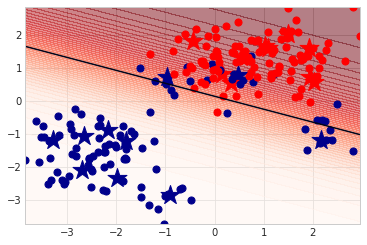

In [47]:
print( np.sum( np.round( logr.predict(test_X).flatten() ) == test_y ) / test_y.shape[0] )
plot_model_results(logr.predict)

## А теперь добавим слоёв

In [48]:
nn = Sequential()
nn.add(Dense(20, input_dim=2, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
nn.fit(data_X, data_y, batch_size=16, nb_epoch=100, verbose=1, validation_data=(test_X, test_y))
print( np.sum( np.round( nn.predict(test_X).flatten() ) == test_y ) / test_y.shape[0] )

Train on 200 samples, validate on 110 samples
Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.7887 - acc: 0.5000 - val_loss: 0.5866 - val_acc: 0.9000
Epoch 2/100
200/200 [==============================] - 0s 160us/step - loss: 0.6938 - acc: 0.5000 - val_loss: 0.5295 - val_acc: 0.9000
Epoch 3/100
200/200 [==============================] - 0s 135us/step - loss: 0.6216 - acc: 0.6250 - val_loss: 0.4869 - val_acc: 0.9636
Epoch 4/100
200/200 [==============================] - 0s 135us/step - loss: 0.5657 - acc: 0.8350 - val_loss: 0.4496 - val_acc: 0.9727
Epoch 5/100
200/200 [==============================] - 0s 128us/step - loss: 0.5204 - acc: 0.8550 - val_loss: 0.4224 - val_acc: 0.9636
Epoch 6/100
200/200 [==============================] - 0s 139us/step - loss: 0.4849 - acc: 0.8650 - val_loss: 0.3959 - val_acc: 0.9636
Epoch 7/100
200/200 [==============================] - 0s 135us/step - loss: 0.4542 - acc: 0.8750 - val_loss: 0.3750 - val_acc: 0.9636
Epoch 8/100

0


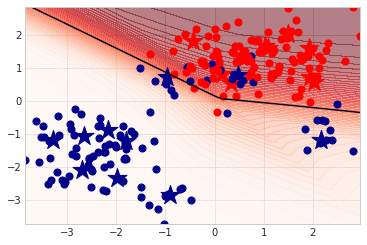

In [49]:
print( np.sum( np.round( nn.predict(test_X).flatten() ) == test_y ) / test_y.shape[0] )
plot_model_results(nn.predict)

In [50]:
def train_one_hidden(num_hidden, activation='relu'):
    nn = Sequential()
    nn.add(Dense(num_hidden, input_dim=2, activation=activation))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    nn.fit(data_X, data_y, batch_size=16, nb_epoch=50, verbose=0, validation_data=(test_X, test_y))
    return nn

def acc(m):
    return (
        np.sum( np.round( m.predict(data_X).flatten() ) == data_y ) / float(data_y.shape[0]),
        np.sum( np.round( m.predict(test_X).flatten() ) == test_y ) / float(test_y.shape[0])
    )

In [51]:
for num_hidden in [2, 5, 10, 20, 50]:
    m = train_one_hidden(num_hidden, activation='relu')
    accs = acc(m)
    print(num_hidden, accs[0], accs[1])

(2, 0.91, 0.9636363636363636)
(5, 0.91, 0.9727272727272728)
(10, 0.915, 0.9727272727272728)
(20, 0.93, 0.9727272727272728)
(50, 0.93, 0.9727272727272728)


In [52]:
nn = Sequential()
nn.add(Dense(20, input_dim=2, activation='relu'))
nn.add(Dense(20, activation='relu'))
# nn.add(Dense(20, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
nn.fit(data_X, data_y, batch_size=16, nb_epoch=12, verbose=1, validation_data=(test_X, test_y))

Train on 200 samples, validate on 110 samples
Epoch 1/12
200/200 [==============================] - 1s 4ms/step - loss: 0.7284 - acc: 0.4500 - val_loss: 0.8404 - val_acc: 0.0909
Epoch 2/12
200/200 [==============================] - 0s 141us/step - loss: 0.6264 - acc: 0.5150 - val_loss: 0.7602 - val_acc: 0.1909
Epoch 3/12
200/200 [==============================] - 0s 133us/step - loss: 0.5615 - acc: 0.6250 - val_loss: 0.7003 - val_acc: 0.4182
Epoch 4/12
200/200 [==============================] - 0s 176us/step - loss: 0.5178 - acc: 0.7600 - val_loss: 0.6485 - val_acc: 0.7455
Epoch 5/12
200/200 [==============================] - 0s 146us/step - loss: 0.4827 - acc: 0.8750 - val_loss: 0.6056 - val_acc: 0.8364
Epoch 6/12
200/200 [==============================] - 0s 123us/step - loss: 0.4534 - acc: 0.9050 - val_loss: 0.5657 - val_acc: 0.9182
Epoch 7/12
200/200 [==============================] - 0s 114us/step - loss: 0.4284 - acc: 0.9050 - val_loss: 0.5316 - val_acc: 0.9273
Epoch 8/12
200/200

0


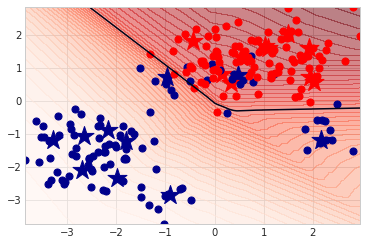

In [53]:
print( np.sum( np.round( nn.predict(test_X).flatten() ) == test_y ) / test_y.shape[0] )
plot_model_results(nn.predict)

In [54]:
def train_two_hidden(num_hidden_1, num_hidden_2, activation='relu'):
    nn = Sequential()
    nn.add(Dense(num_hidden_1, input_dim=2, activation=activation))
    nn.add(Dense(num_hidden_2, activation=activation))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    nn.fit(data_X, data_y, batch_size=16, nb_epoch=50, verbose=0, validation_data=(test_X, test_y))
    return nn

In [55]:
for num_hidden in [2, 5, 10, 20, 50]:
    m = train_two_hidden(num_hidden, num_hidden, activation='relu')
    accs = acc(m)
    print(num_hidden, accs[0], accs[1])

(2, 0.91, 0.9636363636363636)
(5, 0.92, 0.9545454545454546)
(10, 0.93, 0.9818181818181818)
(20, 0.925, 0.9727272727272728)
(50, 0.93, 0.9727272727272728)


0


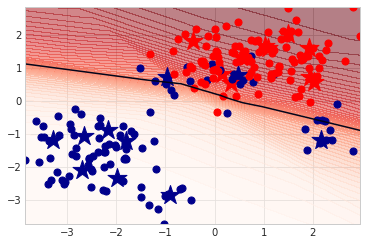

In [56]:
nn = train_two_hidden(10, 10, activation='relu')
print( np.sum( np.round( nn.predict(test_X).flatten() ) == test_y ) / test_y.shape[0] )
plot_model_results(nn.predict)

# Регуляризация

[0.14496612]
[ 1.08135703 -0.01890495 -0.38568961]
[ 1.37247407 -0.06589735 -0.70948954  0.00312471  0.06991957]
[  2.21904567   1.40747409 -11.05203607  -3.9011513   31.41989447
  -2.95792304 -29.16975865   8.78804656   7.64694488  -3.03460862]


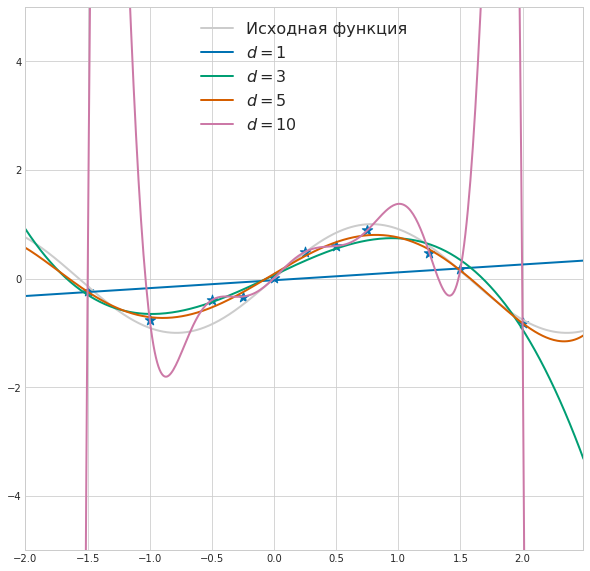

In [57]:
## Исходная функция
orig = lambda x : np.sin(2*x)

## X-координаты точек данных
xd = np.array([-3, -2, -1, -0.5, 0, 0.5, 1, 1.5, 2.5, 3, 4]) / 2
num_points = len(xd)

## Данные
data = orig(xd) + np.random.normal(0, .25, num_points)

## Сетка для рисования
xs = np.arange(xd[0]-.5, xd[-1]+.5, 0.01)

## Выделение полиномиальных признаков
xs_d = np.vstack([xs ** i for i in range(1, num_points+1)]).transpose()
xd_d = np.vstack([xd ** i for i in range(1, num_points+1)]).transpose()

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(xd, data, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=2, label=u"Исходная функция", color="0.8")

set_of_powers = [ 1, 3,5,10 ]
for d in set_of_powers:
    cur_model = linear_model.LinearRegression(fit_intercept=True).fit( xd_d[:, :d], data )
    print(cur_model.coef_)
    ax.plot(xs, cur_model.predict( xs_d[:, :d] ), linewidth=2, label="$d=%d$" % d)

ax.legend(loc="upper center", fontsize=legend_fontsize)
plt.show()

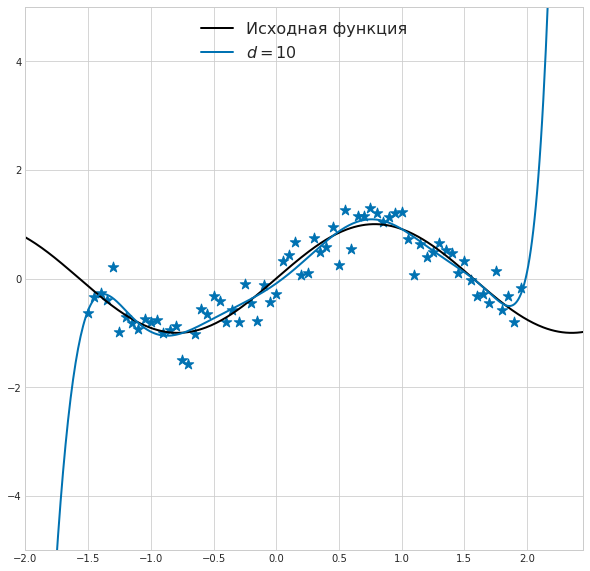

In [58]:
## Исходная функция
orig = lambda x : np.sin(2*x)

## X-координаты точек данных
xd_large = np.arange(-1.5, 2, 0.05)
num_points_l = len(xd_large)

## Данные
data_large = orig(xd_large) + np.random.normal(0, .25, num_points_l)

## Для 
xs = np.arange(xd_large[0]-.5, xd_large[-1]+.5, 0.01)

## Выделение полиномиальных признаков
xs_d = np.vstack([xs ** i for i in range(1, num_points+1)]).transpose()
xd_d_large = np.vstack([xd_large ** i for i in range(1, num_points+1)]).transpose()

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(xd_large, data_large, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=2, label=u"Исходная функция", color="black")

set_of_powers = [ 10 ]

for d in set_of_powers:
    cur_model = linear_model.LinearRegression(fit_intercept=True).fit( xd_d_large[:, :d], data_large )
    ax.plot(xs, cur_model.predict( xs_d[:, :d] ), linewidth=2, label="$d=%d$" % d)

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

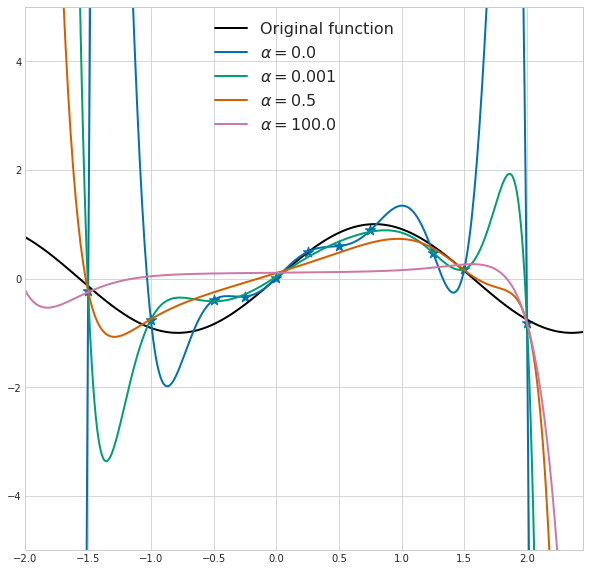

In [59]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(xd, data, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=2, label="Original function", color="black")

m_ridge = []
m_ridge_labels = ["$\\alpha=0.0$", "$\\alpha=0.001$", "$\\alpha=0.5$", "$\\alpha=100.0$"]
for alpha in [0.0, 0.001, 0.5, 100]:
    m_ridge.append( linear_model.Ridge(alpha=alpha, fit_intercept=True).fit( xd_d[:, :12], data ) )

for i in [0,1,2,3]:
    ax.plot(xs, m_ridge[i].predict( xs_d[:, :12] ), linewidth=2, label=m_ridge_labels[i])
# ax.plot(xs, m_ridge_1.predict( xs_d[:, :12] ), linewidth=2, label="$\\alpha=0.001$")
# ax.plot(xs, m_ridge_2.predict( xs_d[:, :12] ), linewidth=2, label="$\\alpha=0.5$")
# ax.plot(xs, m_ridge_3.predict( xs_d[:, :12] ), linewidth=2, label="$\\alpha=10.0$")

# print(m_ridge_3.coef_)

ax.legend(loc="upper center", fontsize=legend_fontsize)
plt.show()

# Домашнее задание: MNIST

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [ ]:
mnist.train.images[10]